In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import geopandas as gpd

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

np.set_printoptions(threshold=20, precision=2, suppress=True)
# Adjust some Pandas display settings so that large dataframes don't scroll off the page
pd.options.display.max_rows = 12
pd.options.display.max_columns = 12
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 12]

    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 5, 1))
 
 
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [4]:
def standard_units(x):
        "Convert any array of numbers to standard units."
        return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

def slope(x, y):
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return  correlation(x, y)* np.std(y,ddof=1)/np.std(x,ddof=1)

def intercept(x, y):
    b1 = slope(x, y)
    return np.average(y) - b1 * np.average(x)

def reg_line(x, y):
    return (intercept(x, y) + slope(x, y)*x)

In [5]:
# Importing and renaming neighborhood demographic data
demographics_df_raw = pd.read_csv("ChicagoNeighborhoodDemographics2018.csv")
demographics_df_raw.loc[65, "GEOG"] = "Loop"
demographics_df_raw = demographics_df_raw.sort_values("GEOG").drop(columns=["MEDINC", "MED_AGE"]).reset_index()

df_interact(demographics_df_raw)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 32 columns) total


In [6]:
# Grouping and cleaning demographics df by region
demographics_df = demographics_df_raw.groupby(["REGION"], as_index=False).agg('sum') 
demographics_df["WHITE (%)"] = demographics_df["WHITE"]*100/demographics_df["TOT_POP"]
demographics_df["BLACK (%)"] = demographics_df["BLACK"]*100/demographics_df["TOT_POP"]
demographics_df["HISP (%)"] = demographics_df["HISP"]*100/demographics_df["TOT_POP"]
demographics_df["ASIAN (%)"] = demographics_df["ASIAN"]*100/demographics_df["TOT_POP"]

demographics_df["UND19 (%)"] = demographics_df["UND19"]*100/demographics_df["TOT_POP"]
demographics_df["A20_34 (%)"] = demographics_df["A20_34"]*100/demographics_df["TOT_POP"]
demographics_df["A35_49 (%)"] = demographics_df["A35_49"]*100/demographics_df["TOT_POP"]
demographics_df["A50_64 (%)"] = demographics_df["A50_64"]*100/demographics_df["TOT_POP"]
demographics_df["OVER_65 (%)"] = (demographics_df["A65_74"] + demographics_df["A75_84"] + demographics_df["OV85"])*100/demographics_df["TOT_POP"]

demographics_df["INC_TOT"] = demographics_df["INC_LT_25K"] + demographics_df["INC_25_50K"] + demographics_df["INC_50_75K"] + demographics_df["INC_75_100K"] + demographics_df["INC_100_150K"] + demographics_df["INC_100_150K"]
demographics_df["INC_LT_50K (%)"] = (demographics_df["INC_LT_25K"] + demographics_df["INC_25_50K"])*100/demographics_df["INC_TOT"]
demographics_df["INC_50_100K (%)"] = (demographics_df["INC_50_75K"] + demographics_df["INC_75_100K"])*100/demographics_df["INC_TOT"]
demographics_df["INC_GT_100K (%)"] = (demographics_df["INC_100_150K"] + demographics_df["INC_GT_150"])*100/demographics_df["INC_TOT"]


df_interact(demographics_df)

interactive(children=(IntSlider(value=0, description='row', max=9, step=5), IntSlider(value=0, description='co…

(9 rows, 44 columns) total


In [7]:
# data cleaning
vaccine_df_raw = pd.read_csv("ChicagoCovidVaccines_ZipCode.csv").sort_values("Region").dropna().reset_index().drop(columns="index").drop([15])
vaccine_df_raw["Vaccine Series Completed (%)"] = vaccine_df_raw["Vaccine Series Completed - Cumulative"]*100/vaccine_df_raw["Population"]
vaccine_df_raw.loc[0, "Region"] = "Central "
for i in np.arange(0, 8):
    vaccine_df_raw.loc[i, "Region"] = "Central"
df_interact(vaccine_df_raw)

interactive(children=(IntSlider(value=0, description='row', max=58, step=5), IntSlider(value=0, description='c…

(58 rows, 15 columns) total


Text(0.5, 0, 'Vaccine Series Completed (%)')

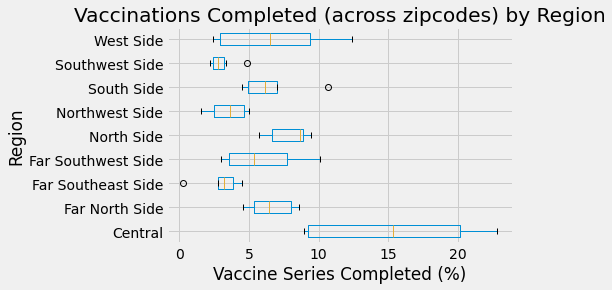

In [10]:
# Distribution of vaccines across each neighborhood within each region of Chicago
vaccine_df_raw.boxplot("Vaccine Series Completed (%)", by="Region", vert=False)
plots.suptitle("")
plots.title("Vaccinations Completed (across zipcodes) by Region")
plots.ylabel("Region")
plots.xlabel("Vaccine Series Completed (%)")


In [11]:
# Cleaning vaccination data 
vaccine_df = vaccine_df_raw[["Region", "Total Doses - Cumulative", "1st Dose - Cumulative", "Vaccine Series Completed - Cumulative", "Population"]].groupby(["Region"], as_index=False).agg('sum') #vaccine_df = vaccine_df.sort_values(by=["Region"], ascending=False).reset_index().drop(columns="index")
vaccine_df["Total Doses - Cumulative (%)"] = vaccine_df["Total Doses - Cumulative"]*100/vaccine_df["Population"]
vaccine_df["1st Dose - Cumulative (%)"] = vaccine_df["1st Dose - Cumulative"]*100/vaccine_df["Population"]
vaccine_df

,Region,Total Doses - Cumulative,1st Dose - Cumulative,Vaccine Series Completed - Cumulative,Population,Total Doses - Cumulative (%),1st Dose - Cumulative (%)
0,Central,44799,27581,17218,140651,31.85,19.61
1,Far North Side,99496,68374,31122,476603,20.88,14.35
2,Far Southeast Side,28072,19596,8476,250186,11.22,7.83
3,Far Southwest Side,31624,21725,9899,188614,16.77,11.52
4,North Side,86722,56736,29986,396235,21.89,14.32
5,Northwest Side,38266,28233,10033,276259,13.85,10.22
6,South Side,40896,26133,14763,221874,18.43,11.78
7,Southwest Side,49080,37375,11705,377536,13.00,9.90
8,West Side,73288,50373,22915,436280,16.80,11.55


In [13]:
# Chicago regional demographics - exploratory analysis

# Racial demographics by region
race_df = demographics_df[["REGION", "WHITE (%)", "HISP (%)", "BLACK (%)", "ASIAN (%)"]].sort_values(by=["BLACK (%)"])
race_df


,REGION,WHITE (%),HISP (%),BLACK (%),ASIAN (%)
5,Northwest Side,35.25,55.93,2.35,4.59
4,North Side,66.18,21.60,3.63,5.56
1,Far North Side,53.86,20.11,10.39,12.17
0,Central,65.08,6.15,10.96,14.99
7,Southwest Side,13.30,59.85,23.13,2.87
8,West Side,20.75,33.91,39.93,3.81
3,Far Southwest Side,21.80,12.44,63.44,0.62
6,South Side,13.82,5.89,65.69,12.34
2,Far Southeast Side,5.01,18.07,75.77,0.29


Text(0.5, 1.0, 'Racial Demographics by Chicago Region (II)')

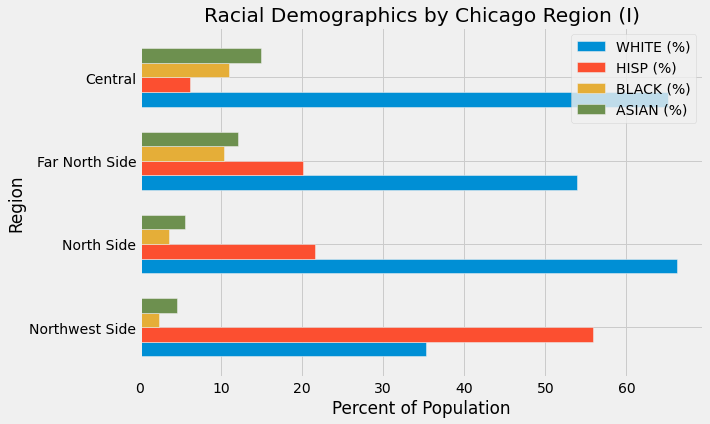

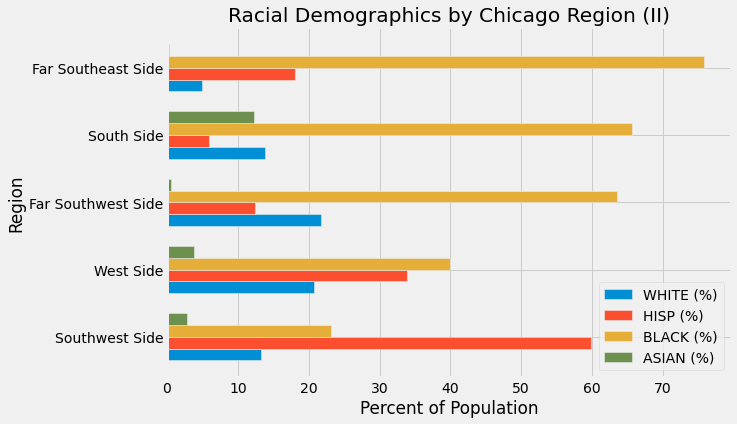

In [14]:
race_df.iloc[0:4].plot.barh("REGION", width=0.7, figsize=(9,6))
plots.xlabel("Percent of Population")
plots.ylabel("Region")
plots.title("Racial Demographics by Chicago Region (I)")

race_df.iloc[4:9].plot.barh("REGION", width=0.7, figsize=(9,6))
plots.xlabel("Percent of Population")
plots.ylabel("Region")
plots.title("Racial Demographics by Chicago Region (II)")

In [15]:
vaccine_df

,Region,Total Doses - Cumulative,1st Dose - Cumulative,Vaccine Series Completed - Cumulative,Population,Total Doses - Cumulative (%),1st Dose - Cumulative (%)
0,Central,44799,27581,17218,140651,31.85,19.61
1,Far North Side,99496,68374,31122,476603,20.88,14.35
2,Far Southeast Side,28072,19596,8476,250186,11.22,7.83
3,Far Southwest Side,31624,21725,9899,188614,16.77,11.52
4,North Side,86722,56736,29986,396235,21.89,14.32
5,Northwest Side,38266,28233,10033,276259,13.85,10.22
6,South Side,40896,26133,14763,221874,18.43,11.78
7,Southwest Side,49080,37375,11705,377536,13.00,9.90
8,West Side,73288,50373,22915,436280,16.80,11.55


In [16]:
# Merging vaccination and demographic data by region
merged_vaccine_demo = pd.merge(left=vaccine_df, right=demographics_df, left_on='Region', right_on='REGION').drop(columns="REGION")
df_interact(merged_vaccine_demo)

interactive(children=(IntSlider(value=0, description='row', max=9, step=5), IntSlider(value=0, description='co…

(9 rows, 50 columns) total


In [17]:
print(correlation(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]))
print(correlation(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]))
print(correlation(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]))
print(correlation(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]))

-0.4373223225123405
0.8057996455693242
0.7881238435872805
-0.555873450374081


Text(0, 0.5, 'Total Doses - Cumulative (%)')

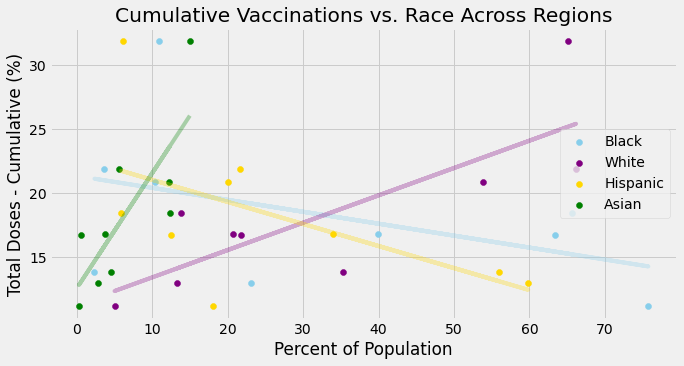

In [18]:
# Relationship between race and cumulative vaccinations in a given region of Chicago (each horizontal set of 4 values)
plots.figure(figsize=(10, 5))  
plots.scatter(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"], color="skyblue", label="Black")
plots.plot(merged_vaccine_demo["BLACK (%)"], reg_line(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]), color="skyblue", alpha=0.3)

plots.scatter(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"], color="purple", label="White")
plots.plot(merged_vaccine_demo["WHITE (%)"], reg_line(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]), color="purple", alpha=0.3)

plots.scatter(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"], color="gold", label="Hispanic")
plots.plot(merged_vaccine_demo["HISP (%)"], reg_line(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]), color="gold", alpha=0.3)

plots.scatter(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"], color="green", label="Asian")
plots.plot(merged_vaccine_demo["ASIAN (%)"], reg_line(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]), color="green", alpha=0.3)

plots.legend(loc="right")
plots.title("Cumulative Vaccinations vs. Race Across Regions")
plots.xlabel("Percent of Population")
plots.ylabel("Total Doses - Cumulative (%)")

Text(0, 0.5, '1st Doses - Cumulative (%)')

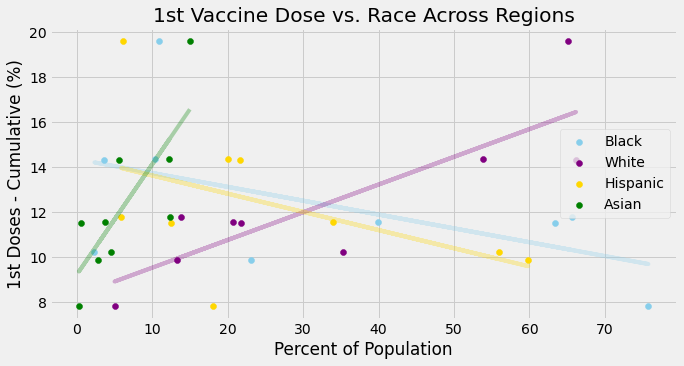

In [19]:
# Relationship between race and 1st dose for vaccinations in a given region of Chicago (each horizontal set of 4 values)
plots.figure(figsize=(10, 5))  
plots.scatter(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"], color="skyblue", label="Black")
plots.plot(merged_vaccine_demo["BLACK (%)"], reg_line(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"]), color="skyblue", alpha=0.3)

plots.scatter(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"], color="purple", label="White")
plots.plot(merged_vaccine_demo["WHITE (%)"], reg_line(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"]), color="purple", alpha=0.3)

plots.scatter(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"], color="gold", label="Hispanic")
plots.plot(merged_vaccine_demo["HISP (%)"], reg_line(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"]), color="gold", alpha=0.3)

plots.scatter(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"], color="green", label="Asian")
plots.plot(merged_vaccine_demo["ASIAN (%)"], reg_line(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["1st Dose - Cumulative (%)"]), color="green", alpha=0.3)

plots.legend(loc="right")
plots.title("1st Vaccine Dose vs. Race Across Regions")
plots.xlabel("Percent of Population")
plots.ylabel("1st Doses - Cumulative (%)")

In [20]:
# age demographics by region
ages_df = merged_vaccine_demo[["Region", "UND19 (%)", "A20_34 (%)", "A35_49 (%)", "A50_64 (%)", "OVER_65 (%)", "Total Doses - Cumulative (%)", "1st Dose - Cumulative (%)"]]
ages_df

,Region,UND19 (%),A20_34 (%),A35_49 (%),A50_64 (%),OVER_65 (%),Total Doses - Cumulative (%),1st Dose - Cumulative (%)
0,Central,10.88,40.54,19.01,16.23,13.34,31.85,19.61
1,Far North Side,20.91,25.89,21.73,18.20,13.27,20.88,14.35
2,Far Southeast Side,26.87,19.60,17.76,19.76,16.00,11.22,7.83
3,Far Southwest Side,25.94,18.18,19.15,21.23,15.50,16.77,11.52
4,North Side,17.79,40.95,21.16,11.98,8.12,21.89,14.32
5,Northwest Side,25.54,22.15,21.80,18.81,11.70,13.85,10.22
6,South Side,24.40,25.16,18.31,17.99,14.14,18.43,11.78
7,Southwest Side,30.26,22.43,19.47,16.10,11.74,13.00,9.90
8,West Side,25.72,30.95,19.86,14.32,9.15,16.80,11.55


Text(0.5, 0, 'Percent of Population')

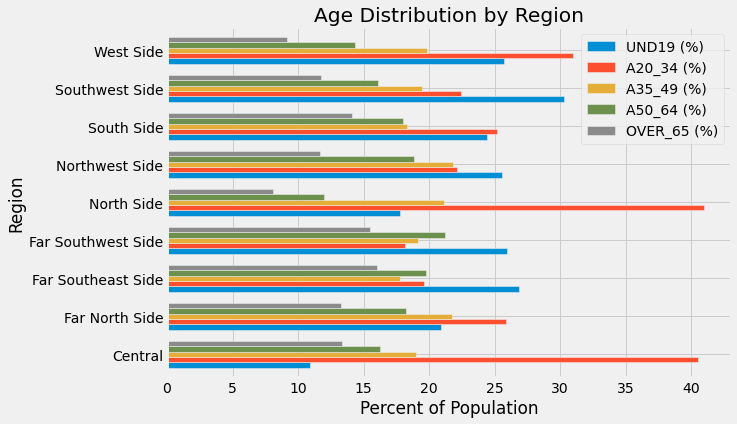

In [21]:
ages_novacc = ages_df.drop(columns=["Total Doses - Cumulative (%)", "1st Dose - Cumulative (%)"])
ages_novacc.plot.barh("Region", width=0.7, figsize=(9,6))
plots.title("Age Distribution by Region")
plots.xlabel("Percent of Population")

Text(0.5, 1.0, 'Age Distribution by Region (I)')

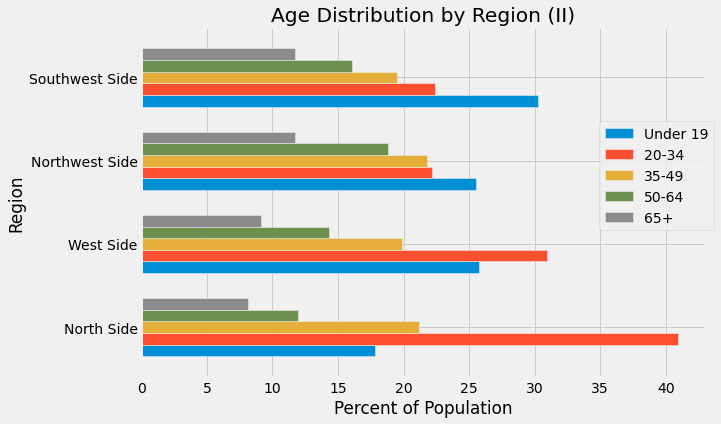

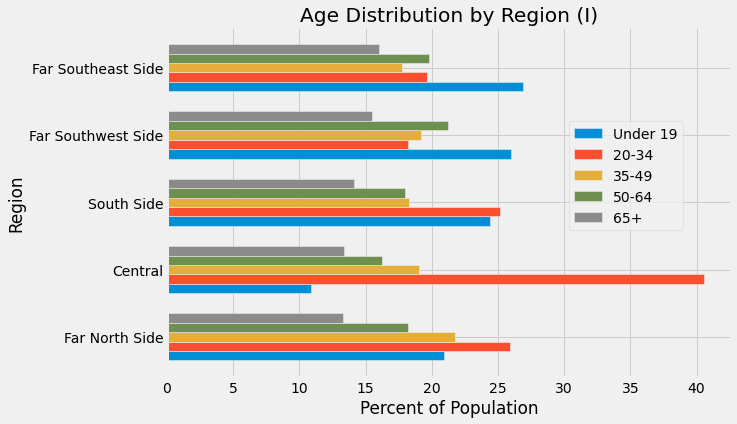

In [22]:
# Age distributions in each region of Chicago
age_labels = ["Under 19", "20-34", "35-49", "50-64", "65+"]
ages_df.drop(columns=["1st Dose - Cumulative (%)", "Total Doses - Cumulative (%)"]).sort_values(by="OVER_65 (%)").iloc[0:4].plot.barh("Region", width=0.7, figsize=(9,6))
plots.legend(bbox_to_anchor=(0.8, 0.4), labels=age_labels)
plots.xlabel("Percent of Population")
plots.title("Age Distribution by Region (II)")

ages_df.drop(columns=["1st Dose - Cumulative (%)", "Total Doses - Cumulative (%)"]).sort_values(by="OVER_65 (%)").iloc[4:10].plot.barh("Region", width=0.7, figsize=(9,6))
plots.legend(bbox_to_anchor=(0.7, 0.4), labels=age_labels)
plots.xlabel("Percent of Population")
plots.title("Age Distribution by Region (I)")

Text(0, 0.5, 'Total Doses - Cumulative (%)')

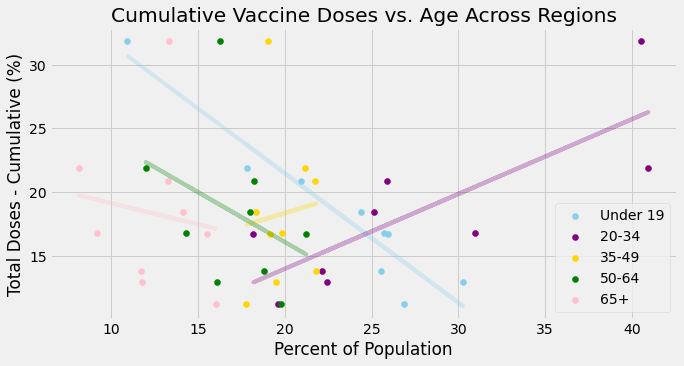

In [24]:
# Relationship between race and 1st dose for vaccinations in a given region of Chicago (each horizontal set of 4 values)
plots.figure(figsize=(10, 5))  
plots.scatter(ages_df["UND19 (%)"], ages_df["Total Doses - Cumulative (%)"], color="skyblue", label="Under 19")
plots.plot(ages_df["UND19 (%)"], reg_line(ages_df["UND19 (%)"], ages_df["Total Doses - Cumulative (%)"]), color="skyblue", alpha=0.3)

plots.scatter(ages_df["A20_34 (%)"], ages_df["Total Doses - Cumulative (%)"], color="purple", label="20-34")
plots.plot(ages_df["A20_34 (%)"], reg_line(ages_df["A20_34 (%)"], ages_df["Total Doses - Cumulative (%)"]), color="purple", alpha=0.3)

plots.scatter(ages_df["A35_49 (%)"], ages_df["Total Doses - Cumulative (%)"], color="gold", label="35-49")
plots.plot(ages_df["A35_49 (%)"], reg_line(ages_df["A35_49 (%)"], ages_df["Total Doses - Cumulative (%)"]), color="gold", alpha=0.3)

plots.scatter(ages_df["A50_64 (%)"], ages_df["Total Doses - Cumulative (%)"], color="green", label="50-64")
plots.plot(ages_df["A50_64 (%)"], reg_line(ages_df["A50_64 (%)"], ages_df["Total Doses - Cumulative (%)"]), color="green", alpha=0.3)


plots.scatter(ages_df["OVER_65 (%)"], ages_df["Total Doses - Cumulative (%)"], color="pink", label="65+")
plots.plot(ages_df["OVER_65 (%)"], reg_line(ages_df["OVER_65 (%)"], ages_df["Total Doses - Cumulative (%)"]), color="pink", alpha=0.3)

plots.legend(loc="lower right")
plots.title("Cumulative Vaccine Doses vs. Age Across Regions")
plots.xlabel("Percent of Population")
plots.ylabel("Total Doses - Cumulative (%)")

<AxesSubplot:ylabel='Region'>

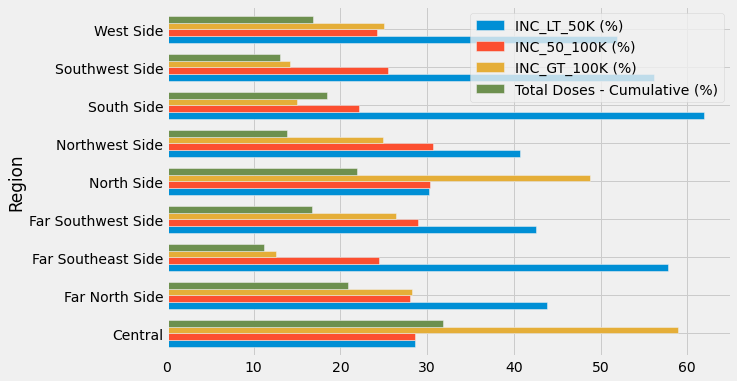

In [25]:
# Exploring associations between income and vaccination data by region

income_df = merged_vaccine_demo[["Region", "INC_LT_50K (%)", "INC_50_100K (%)", "INC_GT_100K (%)", "Total Doses - Cumulative (%)", "1st Dose - Cumulative (%)"]]
income_df.drop(columns="1st Dose - Cumulative (%)").plot.barh("Region", width=0.7, figsize=(9,6))



Text(0, 0.5, 'Total Doses - Cumulative (%)')

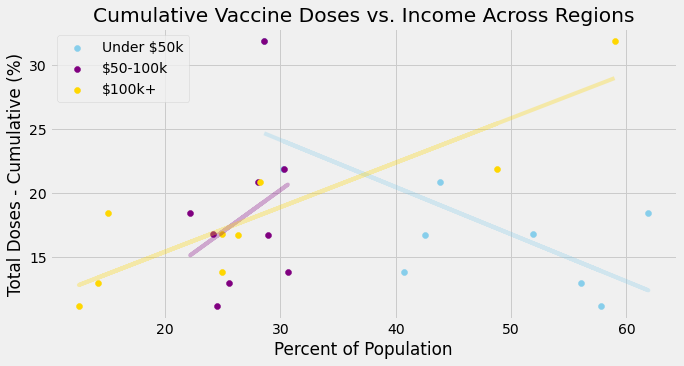

In [26]:
plots.figure(figsize=(10, 5))  
plots.scatter(income_df["INC_LT_50K (%)"], income_df["Total Doses - Cumulative (%)"], color="skyblue", label="Under $50k")
plots.plot(income_df["INC_LT_50K (%)"], reg_line(income_df["INC_LT_50K (%)"], income_df["Total Doses - Cumulative (%)"]), color="skyblue", alpha=0.3)

plots.scatter(income_df["INC_50_100K (%)"], income_df["Total Doses - Cumulative (%)"], color="purple", label="$50-100k")
plots.plot(income_df["INC_50_100K (%)"], reg_line(income_df["INC_50_100K (%)"], income_df["Total Doses - Cumulative (%)"]), color="purple", alpha=0.3)

plots.scatter(income_df["INC_GT_100K (%)"], income_df["Total Doses - Cumulative (%)"], color="gold", label="$100k+")
plots.plot(income_df["INC_GT_100K (%)"], reg_line(income_df["INC_GT_100K (%)"], income_df["Total Doses - Cumulative (%)"]), color="gold", alpha=0.3)


plots.legend()
plots.title("Cumulative Vaccine Doses vs. Income Across Regions")
plots.xlabel("Percent of Population")
plots.ylabel("Total Doses - Cumulative (%)")

In [27]:
# Covid Infection, Testing, and Death Data

In [28]:
# Importing and cleaning zip code infection, testing, and death data
covid_df_raw = pd.read_csv("COVID-19_Cases_Tests_and_Deaths_by_ZIP_Code.csv")
df_interact(covid_df_raw)

interactive(children=(IntSlider(value=0, description='row', max=3009, step=5), IntSlider(value=0, description=…

(3009 rows, 22 columns) total


In [29]:
# Proportions
covid_df = covid_df_raw.groupby(["Region", "Week Number"], as_index=False).agg('sum').drop(columns=["ZIP Code", "Percent Tested Positive - Weekly", "Percent Tested Positive - Cumulative", "Longitude Coordinate"]).sort_values(["Region", "Week Number"]).reset_index().drop(columns="index")
df_interact(covid_df)

interactive(children=(IntSlider(value=0, description='row', max=459, step=5), IntSlider(value=0, description='…

(459 rows, 15 columns) total


In [30]:
covid_df1 = covid_df.iloc[0:255]
covid_df2 = covid_df.iloc[255:460]

Text(35.02675833333332, 0.5, 'Cases - Weekly (per 100,000)')

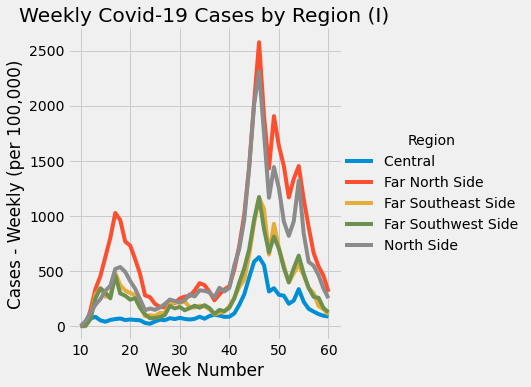

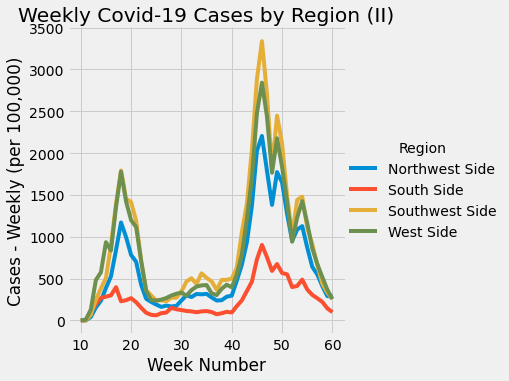

In [31]:
sns.relplot(x="Week Number", y="Cases - Weekly", data=covid_df1, hue="Region", kind="line", ci = None, height=5)
plots.title("Weekly Covid-19 Cases by Region (I)")
plots.ylabel("Cases - Weekly (per 100,000)")

sns.relplot(x="Week Number", y="Cases - Weekly", data=covid_df2, hue="Region", kind="line", ci = None, height=5)
plots.title("Weekly Covid-19 Cases by Region (II)")
plots.ylabel("Cases - Weekly (per 100,000)")

Text(0.5, 1.0, 'Weekly Covid-19 Cases by Region')

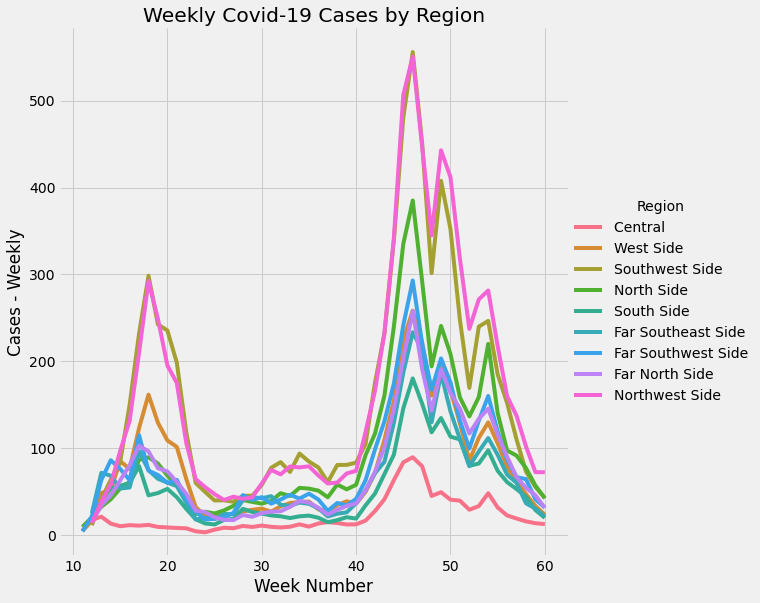

In [32]:
sns.relplot(x="Week Number", y="Cases - Weekly", data=covid_df_raw, hue="Region", kind="line", ci = None, height=8)
plots.title("Weekly Covid-19 Cases by Region")

Text(31.106350347222218, 0.5, 'Date Rate/100,000 - Weekly')

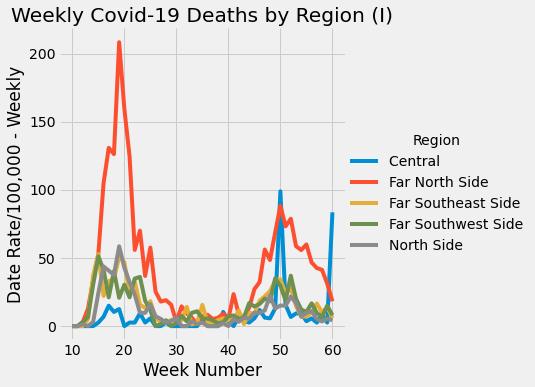

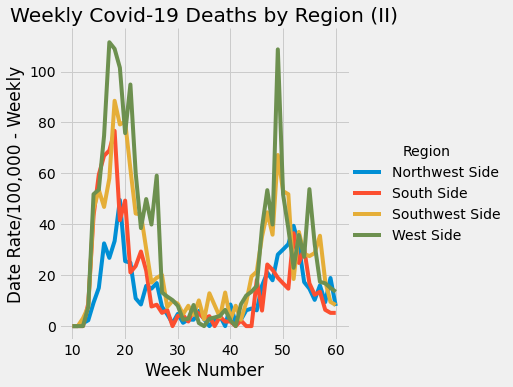

In [33]:

sns.relplot(x="Week Number", y="Death Rate - Weekly", data=covid_df1, hue="Region", kind="line", ci = None)
plots.title("Weekly Covid-19 Deaths by Region (I)")
plots.ylabel("Date Rate/100,000 - Weekly")

sns.relplot(x="Week Number", y="Death Rate - Weekly", data=covid_df2, hue="Region", kind="line", ci = None)
plots.title("Weekly Covid-19 Deaths by Region (II)")
plots.ylabel("Date Rate/100,000 - Weekly")

Text(34.309305266203694, 0.5, 'Weekly Test Rate/100,000')

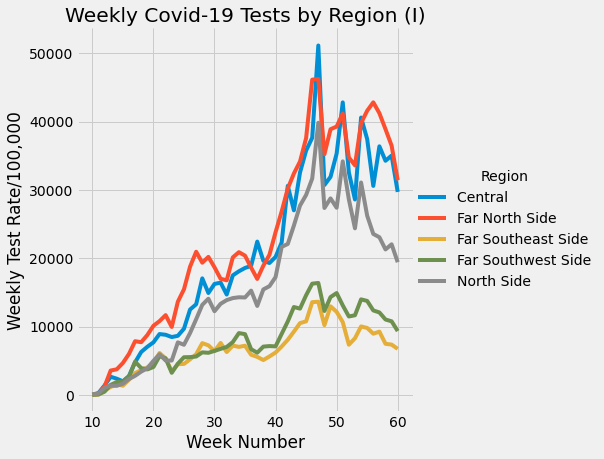

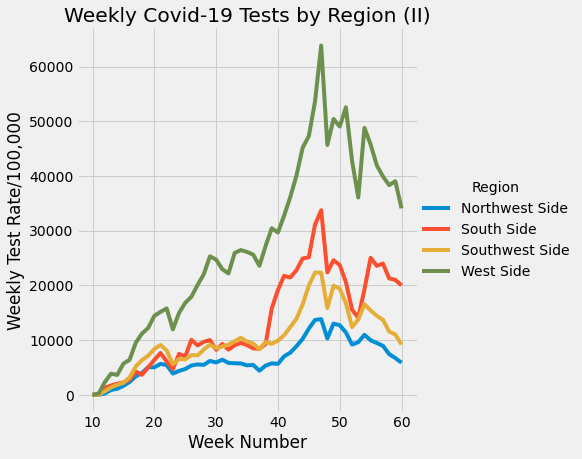

In [34]:
sns.relplot(x="Week Number", y="Test Rate - Weekly", data=covid_df1, hue="Region", kind="line", ci = None, height=6)
plots.title("Weekly Covid-19 Tests by Region (I)")
plots.ylabel("Weekly Test Rate/100,000")

sns.relplot(x="Week Number", y="Test Rate - Weekly", data=covid_df2, hue="Region", kind="line", ci = None, height=6)
plots.title("Weekly Covid-19 Tests by Region (II)")
plots.ylabel("Weekly Test Rate/100,000")


In [35]:
segmented_data = covid_df_raw[covid_df_raw["Week Number"] == 50]
covid_df_raw["Latitude Coordinate"] = pd.to_numeric(covid_df_raw["Latitude Coordinate"],errors='coerce')
covid_df_raw["Longitude Coordinate"] = pd.to_numeric(covid_df_raw["Longitude Coordinate"],errors='coerce')

df_interact(segmented_data)

interactive(children=(IntSlider(value=0, description='row', max=59, step=5), IntSlider(value=0, description='c…

(59 rows, 22 columns) total


In [71]:
# Latest Covid-19 data
grouped_covid_df = segmented_data.groupby(["Region"], as_index=False).agg('sum')[["Region", "Cases - Weekly", "Cases - Cumulative", "Case Rate - Weekly", "Case Rate - Cumulative", "Death Rate - Weekly", "Death Rate - Cumulative", "Deaths - Cumulative"]]
df_interact(grouped_covid_df)

interactive(children=(IntSlider(value=0, description='row', max=9, step=5), IntSlider(value=0, description='co…

(9 rows, 8 columns) total


In [72]:
# gis map data for infections

map_df = gpd.read_file("chicagocc.shp").sort_values("community").reset_index()
region_col = demographics_df_raw["REGION"]
map_df["region"] = region_col
map_df.loc[56, "community"] = "O'HARE"
map_df = map_df.sort_values("community").reset_index()
demographics_df_raw["GEOG"] = demographics_df_raw["GEOG"].str.upper()

merged = pd.merge(map_df, demographics_df_raw, left_on="community", right_on="GEOG")
df_interact(merged)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 45 columns) total


In [73]:
def df_interact2(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 10, col:col + 3]

    interact(peek, row=(0, len(df), 10), col=(0, len(df.columns) - 3, 1))
 
 
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [74]:
# Checking if key columns match exactly after data cleaning
compare = pd.DataFrame({"map_df": map_df["community"],
                        "demo_df": demographics_df_raw["GEOG"],
                        "side": demographics_df_raw["REGION"]
    
})
df_interact2(compare)

interactive(children=(IntSlider(value=0, description='row', max=77, step=10), IntSlider(value=0, description='…

(77 rows, 3 columns) total


In [75]:
# "merged" dataframe = merged map and demographic table

merged["WHITE (%)"] = merged["WHITE"]*100/merged["TOT_POP"]
merged["BLACK (%)"] = merged["BLACK"]*100/merged["TOT_POP"]
merged["HISP (%)"] = merged["HISP"]*100/merged["TOT_POP"]
merged["ASIAN (%)"] = merged["ASIAN"]*100/merged["TOT_POP"]

merged["UND19 (%)"] = merged["UND19"]*100/merged["TOT_POP"]
merged["A20_34 (%)"] = merged["A20_34"]*100/merged["TOT_POP"]
merged["A35_49 (%)"] = merged["A35_49"]*100/merged["TOT_POP"]
merged["A50_64 (%)"] = merged["A50_64"]*100/merged["TOT_POP"]
merged["OVER_65 (%)"] = (merged["A65_74"] + merged["A75_84"] + merged["OV85"])*100/merged["TOT_POP"]

merged["INC_TOT"] = merged["INC_LT_25K"] + merged["INC_25_50K"] + merged["INC_50_75K"] + merged["INC_75_100K"] + merged["INC_100_150K"] + merged["INC_100_150K"]
merged["INC_LT_50K (%)"] = (merged["INC_LT_25K"] + merged["INC_25_50K"])*100/merged["INC_TOT"]
merged["INC_50_100K (%)"] = (merged["INC_50_75K"] + merged["INC_75_100K"])*100/merged["INC_TOT"]
merged["INC_GT_100K (%)"] = (merged["INC_100_150K"] + merged["INC_GT_150"])*100/merged["INC_TOT"]

merged = merged.drop(columns={"community", "region"}).rename(columns={"GEOG": "Neighborhood", "REGION" : "Region"})

df_interact(merged)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 56 columns) total


In [76]:
# merging covid data, demographic data, and spatial data
grouped_covid_df.loc[0, "Region"] = "Central"
map_df2 = map_df.rename(columns={"region" : "Region"})
map_merge = pd.merge(merged, grouped_covid_df, how="left", on="Region")

df_interact(map_merge)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 63 columns) total


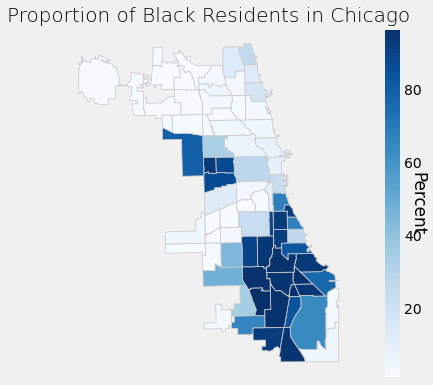

In [77]:
# visualizing proportion of black residents across Chicago

# set a variable that will call whatever column we want to visualise on the map
variable = "BLACK (%)"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis("off")
ax.set_title("Proportion of Black Residents in Chicago", fontdict={"fontsize": "20", "fontweight" : "3"})
# set the range for the choropleth
vmin, vmax = merged["BLACK (%)"].min(), merged["BLACK (%)"].max()


# Create colorbar as a legend
sm = plots.cm.ScalarMappable(cmap="Blues", norm=plots.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
cbar.set_label('Percent', rotation=270)



In [78]:
# Combining covid infection, mortality data with demographic data by region

demographics_df_noregion = demographics_df.drop(columns="REGION")
demo_covid_df = pd.concat([demographics_df,grouped_covid_df], axis=1)

df_interact(demo_covid_df)

interactive(children=(IntSlider(value=0, description='row', max=9, step=5), IntSlider(value=0, description='co…

(9 rows, 52 columns) total


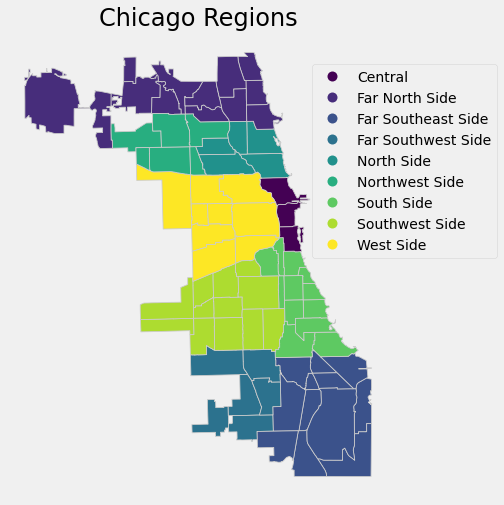

In [79]:
# GIS visualizations - testing that mapping of regions worked properly

# set a variable that will call whatever column we want to visualise on the map
variable = "Region"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 8))

# create map
map_merge.plot(column=variable, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'loc': 'lower right'})
ax.axis("off")
ax.set_title("Chicago Regions", fontdict={"fontsize": "24"})
ax.get_legend().set_bbox_to_anchor((1.3,0.5))


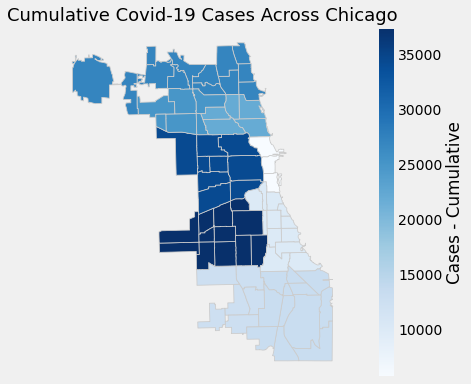

In [122]:
# GIS visualizations 

# set a variable that will call whatever column we want to visualise on the map
variable = "Cases - Cumulative"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_merge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={"label": "Cases - Cumulative"})
ax.axis("off")
ax.set_title("Cumulative Covid-19 Cases Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth
vmin, vmax = map_merge["Cases - Cumulative"].min(), map_merge["Cases - Cumulative"].max()




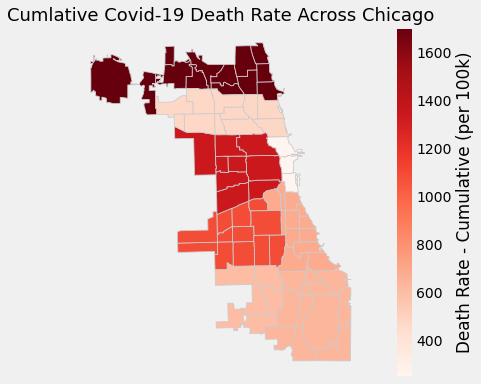

In [81]:
variable = "Death Rate - Cumulative"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_merge.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={"label": "Death Rate - Cumulative (per 100k)"})
ax.axis("off")
ax.set_title("Cumulative Covid-19 Death Rate Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth
vmin, vmax = map_merge["Death Rate - Cumulative"].min(), map_merge["Death Rate - Cumulative"].max()



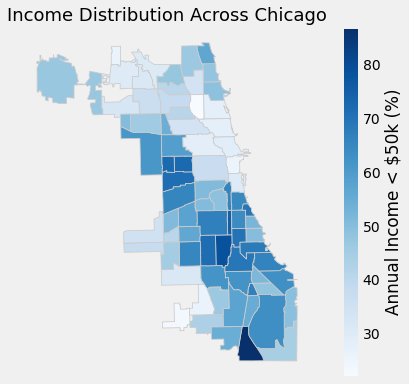

In [84]:
# GIS visualizations 

# set a variable that will call whatever column we want to visualise on the map
variable = "INC_LT_50K (%)"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_merge.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={"label": "Annual Income < $50k (%)"})
ax.axis("off")
ax.set_title("Income Distribution Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth
vmin, vmax = map_merge["INC_LT_50K (%)"].min(), map_merge["INC_LT_50K (%)"].max()




In [85]:
# Create colorbar as a legend
sm = plots.cm.ScalarMappable(cmap="Blues", norm=plots.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
cbar.set_label('Percent', rotation=270)




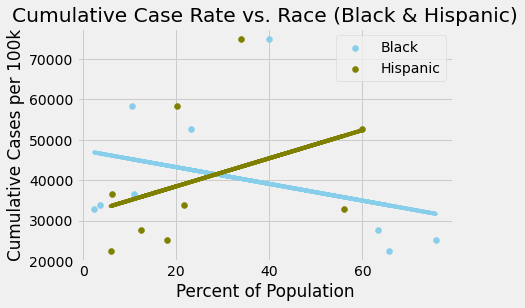

Text(0, 0.5, 'Cumulative Case Rate per 100k')

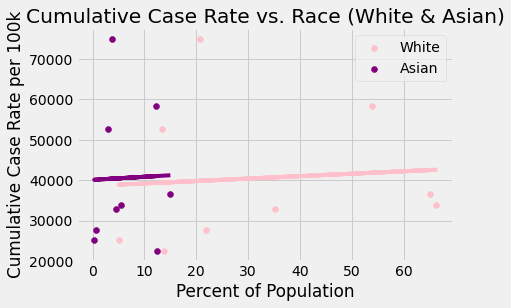

In [103]:
# Relationship between race and infection 

plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Cumulative"], color="skyblue", label="Black")
plots.plot(demo_covid_df["BLACK (%)"], reg_line(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Cumulative"]), color="skyblue")

plots.scatter(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Cumulative"], color="olive", label="Hispanic")
plots.plot(demo_covid_df["HISP (%)"], reg_line(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Cumulative"]), color="olive")


plots.legend()
plots.title("Cumulative Case Rate vs. Race (Black & Hispanic)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Cases per 100k")
plots.show()



plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Cumulative"], color="pink", label="White")
plots.plot(demo_covid_df["WHITE (%)"], reg_line(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Cumulative"]), color="pink")

plots.scatter(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"], color="purple", label="Asian")
plots.plot(demo_covid_df["ASIAN (%)"], reg_line(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"]), color="purple")


plots.legend()
plots.title("Cumulative Case Rate vs. Race (White & Asian)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Case Rate per 100k")


In [87]:
correlation(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"])

0.023373310441759207

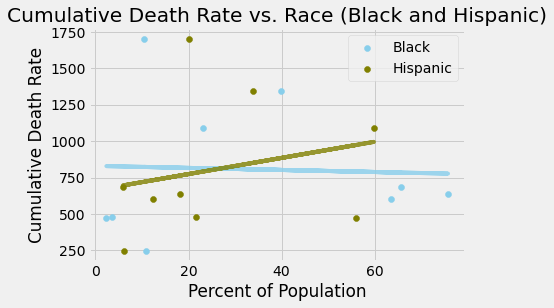

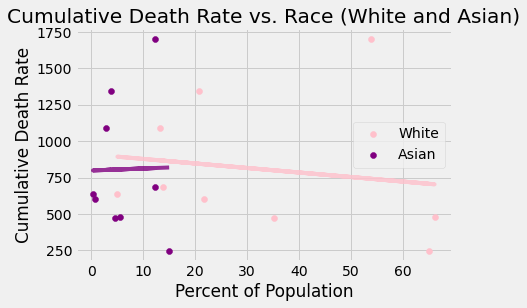

In [88]:
# Relationship between race and death 

plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"], color="skyblue", label="Black")
plots.plot(demo_covid_df["BLACK (%)"], reg_line(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"]), color="skyblue", alpha=0.8)

plots.scatter(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"], color="olive", label="Hispanic")
plots.plot(demo_covid_df["HISP (%)"], reg_line(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"]), color="olive", alpha=0.8)


plots.legend()
plots.title("Cumulative Death Rate vs. Race (Black and Hispanic)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Death Rate")
plots.show()



plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"], color="pink", label="White")
plots.plot(demo_covid_df["WHITE (%)"], reg_line(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"]), color="pink", alpha=0.8)

plots.scatter(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"], color="purple", label="Asian")
plots.plot(demo_covid_df["ASIAN (%)"], reg_line(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"]), color="purple", alpha=0.8)


plots.legend()
plots.title("Cumulative Death Rate vs. Race (White and Asian)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Death Rate")
plots.show()



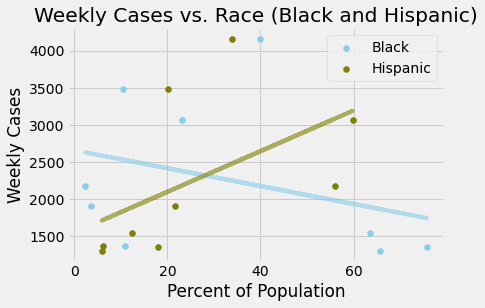

Text(0, 0.5, 'Weekly Cases')

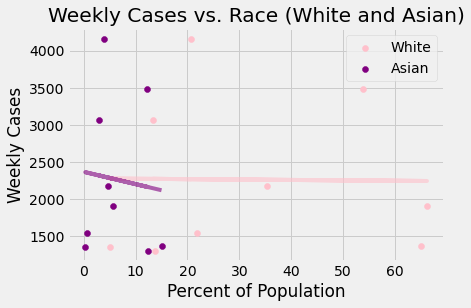

In [89]:
# Relationship between race and infection 

plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Weekly"], color="skyblue", label="Black")
plots.plot(demo_covid_df["BLACK (%)"], reg_line(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Weekly"]), color="skyblue", alpha=0.6)

plots.scatter(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Weekly"], color="olive", label="Hispanic")
plots.plot(demo_covid_df["HISP (%)"], reg_line(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Weekly"]), color="olive", alpha=0.6)


plots.legend()
plots.title("Weekly Cases vs. Race (Black and Hispanic)")
plots.xlabel("Percent of Population")
plots.ylabel("Weekly Cases")
plots.show()



plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Weekly"], color="pink", label="White")
plots.plot(demo_covid_df["WHITE (%)"], reg_line(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Weekly"]), color="pink", alpha=0.6)

plots.scatter(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Weekly"], color="purple", label="Asian")
plots.plot(demo_covid_df["ASIAN (%)"], reg_line(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Weekly"]), color="purple", alpha=0.6)


plots.legend()
plots.title("Weekly Cases vs. Race (White and Asian)")
plots.xlabel("Percent of Population")
plots.ylabel("Weekly Cases")


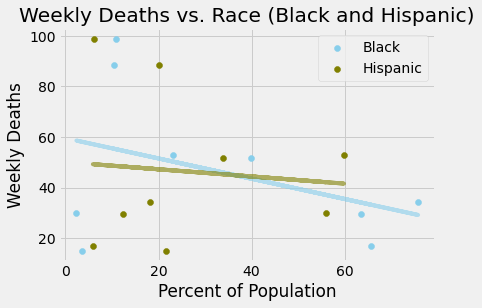

Text(0, 0.5, 'Weekly Deaths')

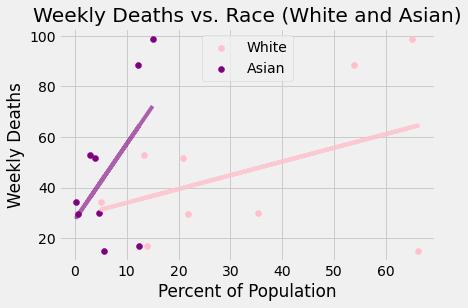

In [90]:
# Relationship between race and infection 

plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Weekly"], color="skyblue", label="Black")
plots.plot(demo_covid_df["BLACK (%)"], reg_line(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Weekly"]), color="skyblue", alpha=0.6)

plots.scatter(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Weekly"], color="olive", label="Hispanic")
plots.plot(demo_covid_df["HISP (%)"], reg_line(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Weekly"]), color="olive", alpha=0.6)


plots.legend()
plots.title("Weekly Deaths vs. Race (Black and Hispanic)")
plots.xlabel("Percent of Population")
plots.ylabel("Weekly Deaths")
plots.show()



plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Weekly"], color="pink", label="White")
plots.plot(demo_covid_df["WHITE (%)"], reg_line(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Weekly"]), color="pink", alpha=0.8)

plots.scatter(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Weekly"], color="purple", label="Asian")
plots.plot(demo_covid_df["ASIAN (%)"], reg_line(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Weekly"]), color="purple", alpha=0.6)


plots.legend()
plots.title("Weekly Deaths vs. Race (White and Asian)")
plots.xlabel("Percent of Population")
plots.ylabel("Weekly Deaths")


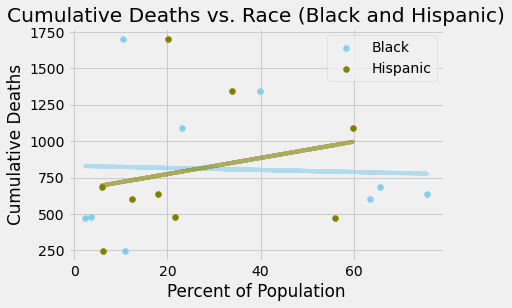

Text(0, 0.5, 'Cumulative Death Rate')

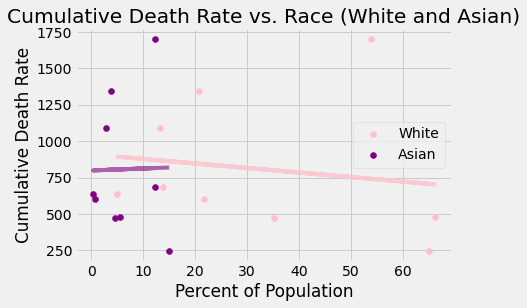

In [91]:
# Relationship between race and infection 

plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"], color="skyblue", label="Black")
plots.plot(demo_covid_df["BLACK (%)"], reg_line(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"]), color="skyblue", alpha=0.6)

plots.scatter(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"], color="olive", label="Hispanic")
plots.plot(demo_covid_df["HISP (%)"], reg_line(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"]), color="olive", alpha=0.6)


plots.legend()
plots.title("Cumulative Deaths vs. Race (Black and Hispanic)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Deaths")
plots.show()



plots.figure(figsize=(6, 4)) 
plots.scatter(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"], color="pink", label="White")
plots.plot(demo_covid_df["WHITE (%)"], reg_line(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"]), color="pink", alpha=0.8)

plots.scatter(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"], color="purple", label="Asian")
plots.plot(demo_covid_df["ASIAN (%)"], reg_line(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"]), color="purple", alpha=0.6)


plots.legend()
plots.title("Cumulative Death Rate vs. Race (White and Asian)")
plots.xlabel("Percent of Population")
plots.ylabel("Cumulative Death Rate")


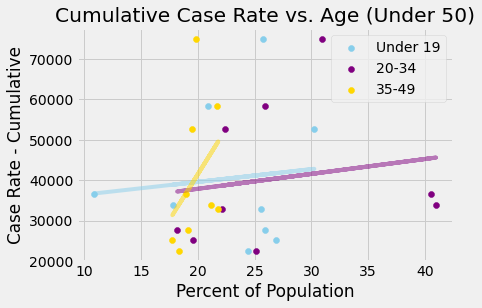

Text(0, 0.5, 'Case Rate - Cumulative')

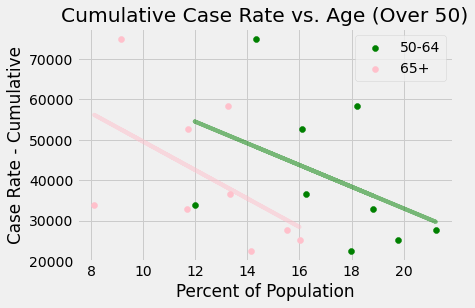

In [92]:
# Relationship between age and infection

plots.scatter(demo_covid_df["UND19 (%)"], demo_covid_df["Case Rate - Cumulative"], color="skyblue", label="Under 19")
plots.plot(demo_covid_df["UND19 (%)"], reg_line(demo_covid_df["UND19 (%)"], demo_covid_df["Case Rate - Cumulative"]), color="skyblue", alpha=0.5)

plots.scatter(demo_covid_df["A20_34 (%)"], demo_covid_df["Case Rate - Cumulative"], color="purple", label="20-34")
plots.plot(demo_covid_df["A20_34 (%)"], reg_line(demo_covid_df["A20_34 (%)"], demo_covid_df["Case Rate - Cumulative"]), color="purple", alpha=0.5)

plots.scatter(demo_covid_df["A35_49 (%)"], demo_covid_df["Case Rate - Cumulative"], color="gold", label="35-49")
plots.plot(demo_covid_df["A35_49 (%)"], reg_line(demo_covid_df["A35_49 (%)"], demo_covid_df["Case Rate - Cumulative"]), color="gold", alpha=0.5)

plots.legend(loc="upper right")
plots.title("Cumulative Case Rate vs. Age (Under 50)")
plots.xlabel("Percent of Population")
plots.ylabel("Case Rate - Cumulative")
plots.show()


plots.scatter(demo_covid_df["A50_64 (%)"], demo_covid_df["Case Rate - Cumulative"], color="green", label="50-64")
plots.plot(demo_covid_df["A50_64 (%)"], reg_line(demo_covid_df["A50_64 (%)"], demo_covid_df["Case Rate - Cumulative"]), color="green", alpha=0.5)


plots.scatter(demo_covid_df["OVER_65 (%)"], demo_covid_df["Case Rate - Cumulative"], color="pink", label="65+")
plots.plot(demo_covid_df["OVER_65 (%)"], reg_line(demo_covid_df["OVER_65 (%)"], demo_covid_df["Case Rate - Cumulative"]), color="pink", alpha=0.5)


plots.legend(loc="upper right")
plots.title("Cumulative Case Rate vs. Age (Over 50)")
plots.xlabel("Percent of Population")
plots.ylabel("Case Rate - Cumulative")

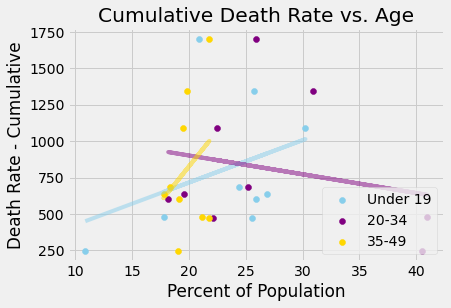

Text(0, 0.5, 'Death Rate - Cumulative')

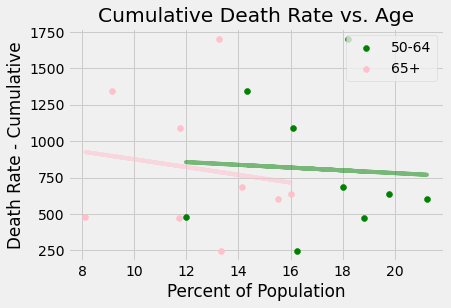

In [93]:
# Relationship between age and infection

plots.scatter(demo_covid_df["UND19 (%)"], demo_covid_df["Death Rate - Cumulative"], color="skyblue", label="Under 19")
plots.plot(demo_covid_df["UND19 (%)"], reg_line(demo_covid_df["UND19 (%)"], demo_covid_df["Death Rate - Cumulative"]), color="skyblue", alpha=0.5)

plots.scatter(demo_covid_df["A20_34 (%)"], demo_covid_df["Death Rate - Cumulative"], color="purple", label="20-34")
plots.plot(demo_covid_df["A20_34 (%)"], reg_line(demo_covid_df["A20_34 (%)"], demo_covid_df["Death Rate - Cumulative"]), color="purple", alpha=0.5)

plots.scatter(demo_covid_df["A35_49 (%)"], demo_covid_df["Death Rate - Cumulative"], color="gold", label="35-49")
plots.plot(demo_covid_df["A35_49 (%)"], reg_line(demo_covid_df["A35_49 (%)"], demo_covid_df["Death Rate - Cumulative"]), color="gold", alpha=0.5)

plots.legend(loc="lower right")
plots.title("Cumulative Death Rate vs. Age")
plots.xlabel("Percent of Population")
plots.ylabel("Death Rate - Cumulative")
plots.show()


plots.scatter(demo_covid_df["A50_64 (%)"], demo_covid_df["Death Rate - Cumulative"], color="green", label="50-64")
plots.plot(demo_covid_df["A50_64 (%)"], reg_line(demo_covid_df["A50_64 (%)"], demo_covid_df["Death Rate - Cumulative"]), color="green", alpha=0.5)


plots.scatter(demo_covid_df["OVER_65 (%)"], demo_covid_df["Death Rate - Cumulative"], color="pink", label="65+")
plots.plot(demo_covid_df["OVER_65 (%)"], reg_line(demo_covid_df["OVER_65 (%)"], demo_covid_df["Death Rate - Cumulative"]), color="pink", alpha=0.5)


plots.legend(loc="upper right")
plots.title("Cumulative Death Rate vs. Age")
plots.xlabel("Percent of Population")
plots.ylabel("Death Rate - Cumulative")

In [94]:
income_covid_df = demo_covid_df[["Region", "INC_LT_50K (%)", "INC_50_100K (%)", "INC_GT_100K (%)", "Cases - Weekly", "Cases - Cumulative", "Case Rate - Weekly", "Case Rate - Cumulative", "Death Rate - Weekly", "Death Rate - Cumulative"]]
df_interact(income_covid_df)

interactive(children=(IntSlider(value=0, description='row', max=9, step=5), IntSlider(value=0, description='co…

(9 rows, 10 columns) total


(array([0, 1, 2, 3]),
 [Text(0, 0, 'South Side'),
  Text(1, 0, 'Far Southeast Side'),
  Text(2, 0, 'Southwest Side'),
  Text(3, 0, 'West Side')])

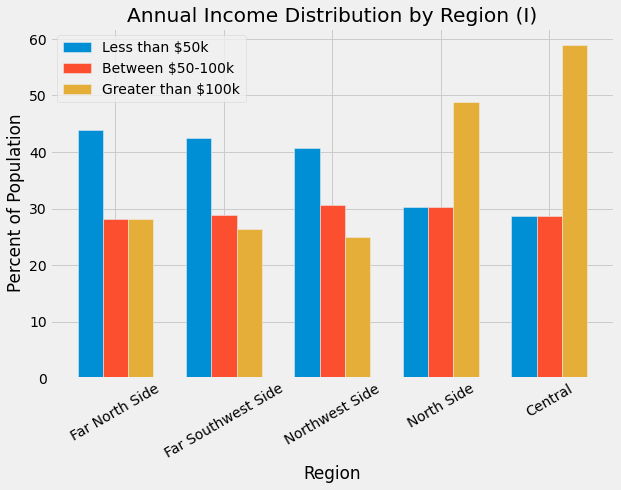

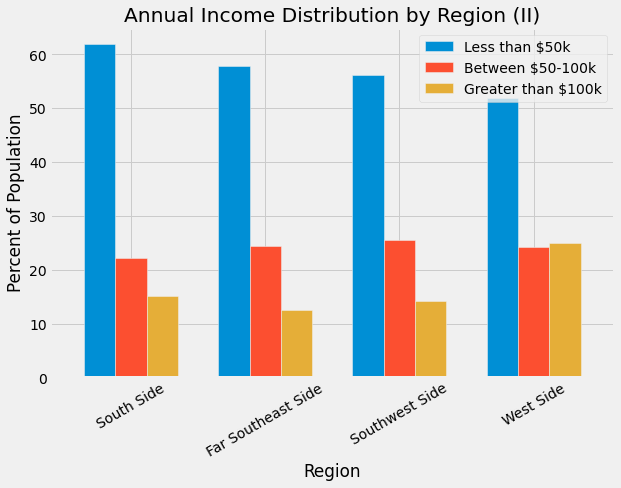

In [95]:
income_cases = income_covid_df[["Region", "INC_LT_50K (%)", "INC_50_100K (%)", "INC_GT_100K (%)"]].sort_values("INC_LT_50K (%)", ascending=False)
                                #, "Case Rate - Cumulative"]]
inclabels = ["Less than $50k", "Between $50-100k", "Greater than $100k"]
income_cases.iloc[4:10].plot.bar("Region", width=0.7, figsize=(9,6))
plots.title("Annual Income Distribution by Region (I)")
plots.ylabel("Percent of Population")
plots.legend(inclabels)
plots.xticks(rotation = 30)


income_cases.iloc[0:4].plot.bar("Region", width=0.7, figsize=(9,6))
plots.title("Annual Income Distribution by Region (II)")
plots.ylabel("Percent of Population")
plots.legend(inclabels)
plots.xticks(rotation = 30)



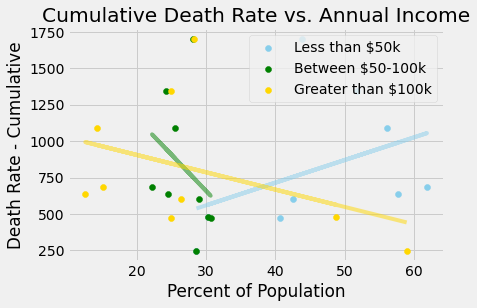

In [96]:
# Relationship between income and infection

plots.scatter(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Death Rate - Cumulative"], color="skyblue", label="Less than $50k")
plots.plot(demo_covid_df["INC_LT_50K (%)"], reg_line(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Death Rate - Cumulative"]), color="skyblue", alpha=0.5)

plots.scatter(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Death Rate - Cumulative"], color="green", label="Between $50-100k")
plots.plot(demo_covid_df["INC_50_100K (%)"], reg_line(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Death Rate - Cumulative"]), color="green", alpha=0.5)

plots.scatter(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Death Rate - Cumulative"], color="gold", label="Greater than $100k")
plots.plot(demo_covid_df["INC_GT_100K (%)"], reg_line(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Death Rate - Cumulative"]), color="gold", alpha=0.5)

plots.legend()
plots.title("Cumulative Death Rate vs. Annual Income")
plots.xlabel("Percent of Population")
plots.ylabel("Death Rate - Cumulative")
plots.show()


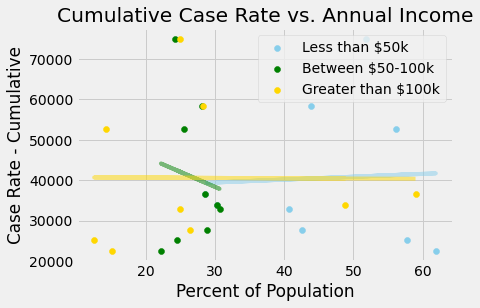

In [97]:
# Relationship between income and infection

plots.scatter(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Case Rate - Cumulative"], color="skyblue", label="Less than $50k")
plots.plot(demo_covid_df["INC_LT_50K (%)"], reg_line(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Case Rate - Cumulative"]), color="skyblue", alpha=0.5)

plots.scatter(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Case Rate - Cumulative"], color="green", label="Between $50-100k")
plots.plot(demo_covid_df["INC_50_100K (%)"], reg_line(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Case Rate - Cumulative"]), color="green", alpha=0.5)

plots.scatter(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Case Rate - Cumulative"], color="gold", label="Greater than $100k")
plots.plot(demo_covid_df["INC_GT_100K (%)"], reg_line(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Case Rate - Cumulative"]), color="gold", alpha=0.5)

plots.legend()
plots.title("Cumulative Case Rate vs. Annual Income")
plots.xlabel("Percent of Population")
plots.ylabel("Case Rate - Cumulative")
plots.show()



In [98]:
slope(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Case Rate - Cumulative"])

70.78527171989019

In [99]:
slope(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Case Rate - Cumulative"])

-741.6083085904343

In [100]:
slope(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Case Rate - Cumulative"])


-6.981543495489518

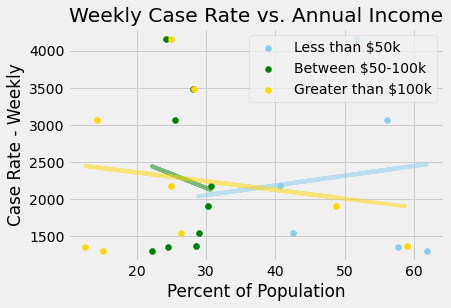

In [68]:
# Relationship between income and infection

plots.scatter(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Case Rate - Weekly"], color="skyblue", label="Less than $50k")
plots.plot(demo_covid_df["INC_LT_50K (%)"], reg_line(demo_covid_df["INC_LT_50K (%)"], demo_covid_df["Case Rate - Weekly"]), color="skyblue", alpha=0.5)

plots.scatter(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Case Rate - Weekly"], color="green", label="Between $50-100k")
plots.plot(demo_covid_df["INC_50_100K (%)"], reg_line(demo_covid_df["INC_50_100K (%)"], demo_covid_df["Case Rate - Weekly"]), color="green", alpha=0.5)

plots.scatter(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Case Rate - Weekly"], color="gold", label="Greater than $100k")
plots.plot(demo_covid_df["INC_GT_100K (%)"], reg_line(demo_covid_df["INC_GT_100K (%)"], demo_covid_df["Case Rate - Weekly"]), color="gold", alpha=0.5)

plots.legend()
plots.title("Weekly Case Rate vs. Annual Income")
plots.xlabel("Percent of Population")
plots.ylabel("Case Rate - Weekly")
plots.show()



In [105]:
# merging geospatial and vaccine data 
map_vaccine = pd.merge(map_merge, vaccine_df, how="left", on="Region")
df_interact(map_vaccine)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 69 columns) total


In [135]:
# create new columns that indicate which income bracket, race, age is the plurality for a given community area
inc_bin = make_array()
n = len(map_vaccine["INC_LT_50K (%)"])
for i in np.arange(0,n):
    if map_vaccine.iloc[i]["INC_LT_50K (%)"] > map_vaccine.iloc[i]["INC_50_100K (%)"] and map_vaccine.iloc[i]["INC_LT_50K (%)"] > map_vaccine.iloc[i]["INC_GT_100K (%)"]:
        inc_bin = np.append(inc_bin, "Under $50k")
    elif map_vaccine.iloc[i]["INC_LT_50K (%)"] < map_vaccine.iloc[i]["INC_50_100K (%)"] and map_vaccine.iloc[i]["INC_LT_50K (%)"] > map_vaccine.iloc[i]["INC_GT_100K (%)"]:
        inc_bin = np.append(inc_bin, "$50k - $100k")
    else:
        inc_bin = np.append(inc_bin, "Above $100k")
        
race_bin = make_array()
for i in np.arange(0,n):
    if map_vaccine.iloc[i]["BLACK (%)"] > map_vaccine.iloc[i]["HISP (%)"] and map_vaccine.iloc[i]["BLACK (%)"] > map_vaccine.iloc[i]["ASIAN (%)"] and map_vaccine.iloc[i]["BLACK (%)"] > map_vaccine.iloc[i]["WHITE (%)"]:
        race_bin = np.append(race_bin, "Black")
    elif map_vaccine.iloc[i]["HISP (%)"] > map_vaccine.iloc[i]["ASIAN (%)"] and map_vaccine.iloc[i]["HISP (%)"] > map_vaccine.iloc[i]["WHITE (%)"]:
        race_bin = np.append(race_bin, "Hispanic")
    elif map_vaccine.iloc[i]["ASIAN (%)"] > map_vaccine.iloc[i]["WHITE (%)"]:
        race_bin = np.append(race_bin, "Asian")
    else:
        race_bin = np.append(race_bin, "White")
        
age_bin = make_array()
for i in np.arange(0,n):
    und19 = map_vaccine.iloc[i]["UND19 (%)"] 
    a20_34 = map_vaccine.iloc[i]["A20_34 (%)"] 
    a35_49 = map_vaccine.iloc[i]["A35_49 (%)"] 
    a50_64 = map_vaccine.iloc[i]["A50_64 (%)"] 
    over65 = map_vaccine.iloc[i]["OVER_65 (%)"] 
    
    if und19 > a20_34 and und19 > a35_49 and und19 > a50_64 and und19 > over65:
        age_bin = np.append(age_bin, "Under 19")
    elif a20_34 > a35_49 and a20_34 > a50_64 and a20_34 > over65:
        age_bin = np.append(age_bin, "20-34")
    elif a35_49 > a50_64 and a35_49 > over65:
        age_bin = np.append(age_bin, "35-49")
    elif a50_64 > over65:
        age_bin = np.append(age_bin, "50-64")
    else:
        age_bin = np.append(age_bin, "65+")


In [136]:
map_vaccine["AGE_BIN"] = age_bin
map_vaccine["RACE_BIN"] = race_bin
map_vaccine["INCOME_BIN"] = inc_bin

Text(0.5, 1.0, 'Vaccine Distribution Across Chicago')

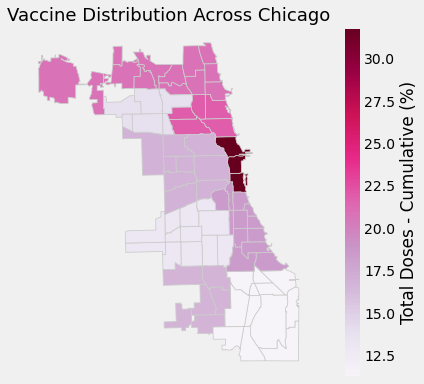

In [120]:
# GIS visualizations 

# set a variable that will call whatever column we want to visualise on the map
variable = "Total Doses - Cumulative (%)"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_vaccine.plot(column=variable, cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={"label": "Total Doses - Cumulative (%)"})
ax.axis("off")
ax.set_title("Vaccine Distribution Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth




Text(0.5, 1.0, 'Vaccine Distribution Across Chicago')

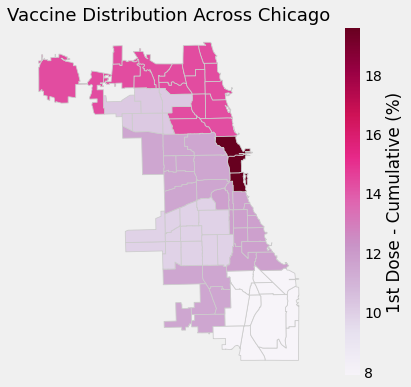

In [121]:
# GIS visualizations 

# set a variable that will call whatever column we want to visualise on the map
variable = "1st Dose - Cumulative (%)"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_vaccine.plot(column=variable, cmap='PuRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
              legend_kwds={"label": "1st Dose - Cumulative (%)"})
ax.axis("off")
ax.set_title("Vaccine Distribution Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth




In [114]:
vaccine_df

,Region,Total Doses - Cumulative,1st Dose - Cumulative,Vaccine Series Completed - Cumulative,Population,Total Doses - Cumulative (%),1st Dose - Cumulative (%)
0,Central,44799,27581,17218,140651,31.85,19.61
1,Far North Side,99496,68374,31122,476603,20.88,14.35
2,Far Southeast Side,28072,19596,8476,250186,11.22,7.83
3,Far Southwest Side,31624,21725,9899,188614,16.77,11.52
4,North Side,86722,56736,29986,396235,21.89,14.32
5,Northwest Side,38266,28233,10033,276259,13.85,10.22
6,South Side,40896,26133,14763,221874,18.43,11.78
7,Southwest Side,49080,37375,11705,377536,13.00,9.90
8,West Side,73288,50373,22915,436280,16.80,11.55


Text(0.5, 1.0, 'Distribution of Seniors Across Chicago')

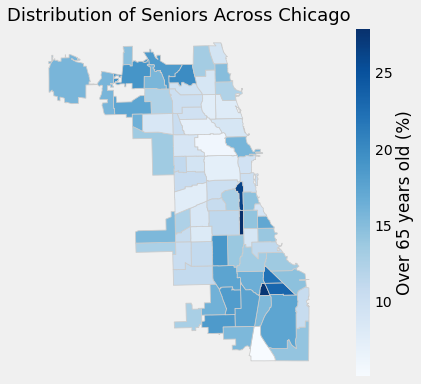

In [196]:
# Age distribution across Chicago

# set a variable that will call whatever column we want to visualise on the map
variable = "OVER_65 (%)"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_vaccine.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={"label": "Over 65 years old (%)"})
ax.axis("off")
ax.set_title("Distribution of Seniors Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth

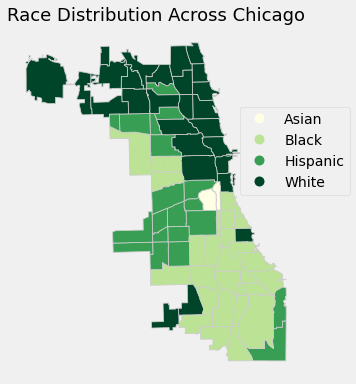

In [156]:
# Race distribution across Chicago

# set a variable that will call whatever column we want to visualise on the map
variable = "RACE_BIN"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_vaccine.plot(column=variable, cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'loc': 'lower right'})
ax.axis("off")
ax.set_title("Race Distribution Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth
ax.get_legend().set_bbox_to_anchor((1.2,0.5))



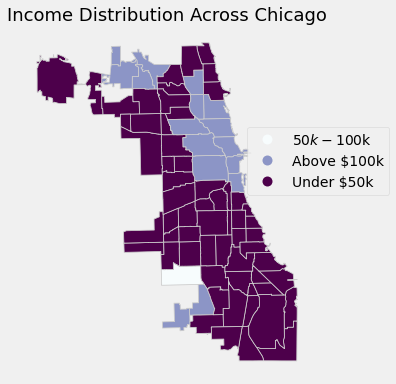

In [158]:
# Income distribution across Chicago

# set a variable that will call whatever column we want to visualise on the map
variable = "INCOME_BIN"

# create figure and axes for Matplotlib
fig, ax = plots.subplots(1, figsize=(10, 6))

# create map
map_vaccine.plot(column=variable, cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'loc': 'lower right'})
ax.axis("off")
ax.set_title("Income Distribution Across Chicago", fontdict={"fontsize": "18"})
# set the range for the choropleth
ax.get_legend().set_bbox_to_anchor((1.3,0.5))



In [ ]:
map_vaccine["AGE_BIN"] = age_bin
map_vaccine["RACE_BIN"] = race_bin
map_vaccine["INCOME_BIN"] = inc_bin

Text(0.5, 1.0, 'Age and Cumulative Vaccine Doses by Region (II)')

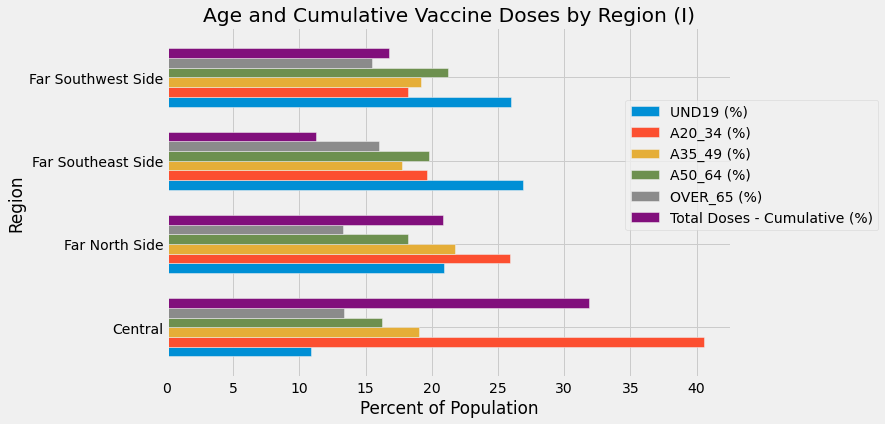

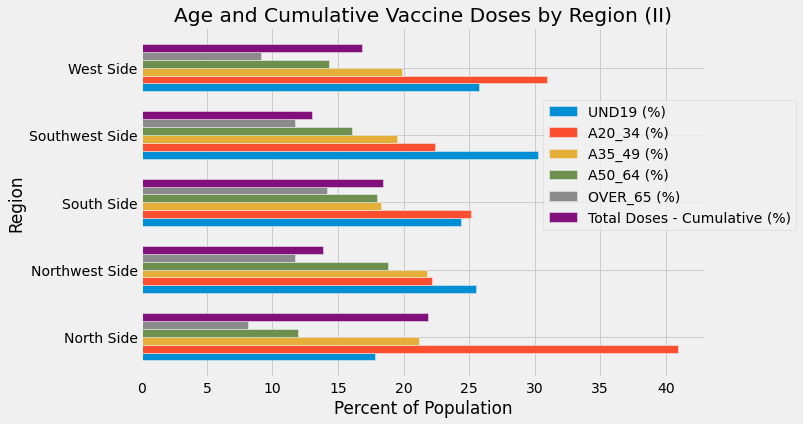

In [152]:
# Exploring relationship between age and cumulative vaccine doses (%) in each region of Chicago
ages_df.drop(columns=["1st Dose - Cumulative (%)"]).iloc[0:4].plot.barh("Region", width=0.7, figsize=(9,6))
plots.legend(bbox_to_anchor=(0.8, 0.4))
plots.xlabel("Percent of Population")
plots.title("Age and Cumulative Vaccine Doses by Region (I)")

ages_df.drop(columns=["1st Dose - Cumulative (%)"]).iloc[4:10].plot.barh("Region", width=0.7, figsize=(9,6))
plots.legend(bbox_to_anchor=(0.7, 0.4))
plots.xlabel("Percent of Population")
plots.title("Age and Cumulative Vaccine Doses by Region (II)")

In [171]:
# Statistical analysis for final analysis section

def bootstrap_slope(df,x, y, repetitions):
    # the number of observations
    n=df.shape[0]
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n,replace=True)
        bootstrap_slope = slope(bootstrap_sample[x], bootstrap_sample[y])
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    
    # Slope of the regression line from the bootstrap
    observed_slope = slope(bootstrap_sample[x],bootstrap_sample[y])
    
    return make_array(observed_slope, left, right)

In [172]:
# race and case rate
cases_stat_df = pd.DataFrame()
var = ["% Black", "% White", "% Hispanic", "% Asian"]
slopes = [slope(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Cumulative"]),
          slope(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Cumulative"]),
          slope(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Cumulative"]),
          slope(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"])]

intercepts = [intercept(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Cumulative"]),
          intercept(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Cumulative"]),
          intercept(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Cumulative"]),
          intercept(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"])]

correlations = [correlation(demo_covid_df["BLACK (%)"], demo_covid_df["Case Rate - Cumulative"]),
          correlation(demo_covid_df["WHITE (%)"], demo_covid_df["Case Rate - Cumulative"]),
          correlation(demo_covid_df["HISP (%)"], demo_covid_df["Case Rate - Cumulative"]),
          correlation(demo_covid_df["ASIAN (%)"], demo_covid_df["Case Rate - Cumulative"])]

a=bootstrap_slope(demo_covid_df, "BLACK (%)", "Case Rate - Cumulative", 1000)
b=bootstrap_slope(demo_covid_df, "WHITE (%)", "Case Rate - Cumulative", 1000)
c=bootstrap_slope(demo_covid_df, "HISP (%)", "Case Rate - Cumulative", 1000)
d=bootstrap_slope(demo_covid_df, "ASIAN (%)", "Case Rate - Cumulative", 1000)

cases_stat_df["Variable"] = var
cases_stat_df["Slope"] = slopes
cases_stat_df["Intercept"] = intercepts
cases_stat_df["Correlation"] = correlations
cases_stat_df["Bstrap Slope"] = [a.take(0), b.take(0), c.take(0), d.take(0)]
cases_stat_df["Bstrap Slope Lower"] = [a.take(1), b.take(1), c.take(1), d.take(1)]
cases_stat_df["Bstrap Slope Upper"] = [a.take(2), b.take(2), c.take(2), d.take(2)]

In [173]:
# race and case rate 
cases_stat_df

,Variable,Slope,Intercept,Correlation,Bstrap Slope,Bstrap Slope Lower,Bstrap Slope Upper
0,% Black,-207.20,47366.63,-0.34,-37.26,-504.17,936.28
1,% White,60.28,38592.47,0.08,-281.32,-425.15,649.62
2,% Hispanic,347.61,31532.89,0.39,313.40,-66.77,1701.88
3,% Asian,76.17,40084.01,0.02,-669.53,-2304.71,2510.44


In [176]:
# race and deaths
cases_stat_df = pd.DataFrame()
var = ["% Black", "% White", "% Hispanic", "% Asian"]
slopes = [slope(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"])]

intercepts = [intercept(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"])]

correlations = [correlation(demo_covid_df["BLACK (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["WHITE (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["HISP (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["ASIAN (%)"], demo_covid_df["Death Rate - Cumulative"])]


cases_stat_df["Variable"] = var
cases_stat_df["Slope"] = slopes
cases_stat_df["Intercept"] = intercepts
cases_stat_df["Correlation"] = correlations


In [177]:
# race and death rate 
cases_stat_df

,Variable,Slope,Intercept,Correlation
0,% Black,-0.70,830.47,-0.04
1,% White,-3.10,909.19,-0.15
2,% Hispanic,5.55,663.14,0.23
3,% Asian,1.38,798.63,0.02


In [181]:
# age and deaths
cases_stat_df = pd.DataFrame()
var = ["Under 19 (%)", "20 - 34 (%)", "35-49 (%)", "50-64 (%)", "65+ (%)"]
slopes = [slope(demo_covid_df["UND19 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["A20_34 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["A35_49 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["A50_64 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          slope(demo_covid_df["OVER_65 (%)"], demo_covid_df["Death Rate - Cumulative"])]

intercepts = [intercept(demo_covid_df["UND19 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["A20_34 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["A35_49 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["A50_64 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          intercept(demo_covid_df["OVER_65 (%)"], demo_covid_df["Death Rate - Cumulative"])]

correlations = [correlation(demo_covid_df["UND19 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["A20_34 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["A35_49 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["A50_64 (%)"], demo_covid_df["Death Rate - Cumulative"]),
          correlation(demo_covid_df["OVER_65 (%)"], demo_covid_df["Death Rate - Cumulative"])]


cases_stat_df["Variable"] = var
cases_stat_df["Slope"] = slopes
cases_stat_df["Intercept"] = intercepts
cases_stat_df["Correlation"] = correlations
cases_stat_df

,Variable,Slope,Intercept,Correlation
0,Under 19 (%),29.10,133.85,0.36
1,20 - 34 (%),-12.90,1159.84,-0.23
2,35-49 (%),97.39,-1121.15,0.30
3,50-64 (%),-9.43,969.50,-0.06
4,65+ (%),-26.64,1141.87,-0.15


In [183]:
df_interact(map_vaccine)

interactive(children=(IntSlider(value=0, description='row', max=77, step=5), IntSlider(value=0, description='c…

(77 rows, 72 columns) total


In [186]:
# analyzing regression output for race and vaccine distribution

# race and deaths
cases_stat_df = pd.DataFrame()
var = ["% Black", "% White", "% Hispanic", "% Asian"]
slopes = [slope(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          slope(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          slope(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          slope(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"])]

intercepts = [intercept(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          intercept(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          intercept(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          intercept(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"])]

correlations = [correlation(merged_vaccine_demo["BLACK (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          correlation(merged_vaccine_demo["WHITE (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          correlation(merged_vaccine_demo["HISP (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"]),
          correlation(merged_vaccine_demo["ASIAN (%)"], merged_vaccine_demo["Total Doses - Cumulative (%)"])]


a=bootstrap_slope(merged_vaccine_demo, "BLACK (%)", "Total Doses - Cumulative (%)", 1000)
b=bootstrap_slope(merged_vaccine_demo, "WHITE (%)", "Total Doses - Cumulative (%)", 1000)
c=bootstrap_slope(merged_vaccine_demo, "HISP (%)", "Total Doses - Cumulative (%)", 1000)
d=bootstrap_slope(merged_vaccine_demo, "ASIAN (%)", "Total Doses - Cumulative (%)", 1000)

cases_stat_df["Variable"] = var
cases_stat_df["Slope"] = slopes
cases_stat_df["Intercept"] = intercepts
cases_stat_df["Correlation"] = correlations
cases_stat_df["Bstrap Slope"] = [a.take(0), b.take(0), c.take(0), d.take(0)]
cases_stat_df["Bstrap Slope Lower"] = [a.take(1), b.take(1), c.take(1), d.take(1)]
cases_stat_df["Bstrap Slope Upper"] = [a.take(2), b.take(2), c.take(2), d.take(2)]

cases_stat_df

,Variable,Slope,Intercept,Correlation,Bstrap Slope,Bstrap Slope Lower,Bstrap Slope Upper
0,% Black,-0.09,21.35,-0.44,-0.05,-0.23,0.03
1,% White,0.21,11.32,0.81,0.17,0.08,0.33
2,% Hispanic,-0.17,22.76,-0.56,-0.21,-0.42,-0.02
3,% Asian,0.90,12.60,0.79,0.93,0.30,1.42
